In [1]:
# importing the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Importing the data from St. Gallen


In [2]:
df = pd.read_excel("0. manual_st_gallen.xlsx")

In [3]:
df

,Konto,B J,NK P J,NK S J,R J,Jahr
0,Aufwand,575287100,30385600.0,3244600.0,6.094222e+08,2008
1,Ertrag,571976100,NaN,NaN,6.110714e+08,2008
2,Aufwand,595513100,22391000.0,4063700.0,6.068747e+08,2009
3,Ertrag,592301600,NaN,NaN,6.095738e+08,2009
4,Aufwand,592097100,19640800.0,2940700.0,6.004823e+08,2010
5,Ertrag,586728500,NaN,NaN,6.071191e+08,2010
6,Aufwand,615051800,15210500.0,3291400.0,6.303327e+08,2011
7,Ertrag,613711100,NaN,NaN,6.307913e+08,2011
8,Aufwand,640177200,4531500.0,2276100.0,6.351884e+08,2012
9,Ertrag,633792200,NaN,NaN,6.346080e+08,2012


## 2. Data cleaning

#### The data needs some cleaning

#### - all the NaN values need to be replaced with 0, for further calculations later

#### - the values should be all divided by one million (1 digit rounding) for easier calculations

In [4]:
# replacing NaN values with 0s
df.fillna(0, inplace=True)

# dividing by one million
df["B J"] = df["B J"].apply(lambda x: round(float(x)/1000000, 1))
df["NK P J"] = df["NK P J"].apply(lambda x: round(float(x)/1000000, 1))
df["NK S J"] = df["NK S J"].apply(lambda x: round(float(x)/1000000, 1))
df["R J"] = df["R J"].apply(lambda x: round(float(x)/1000000, 1))


In [5]:
df

,Konto,B J,NK P J,NK S J,R J,Jahr
0,Aufwand,575.3,30.4,3.2,609.4,2008
1,Ertrag,572.0,0.0,0.0,611.1,2008
2,Aufwand,595.5,22.4,4.1,606.9,2009
3,Ertrag,592.3,0.0,0.0,609.6,2009
4,Aufwand,592.1,19.6,2.9,600.5,2010
5,Ertrag,586.7,0.0,0.0,607.1,2010
6,Aufwand,615.1,15.2,3.3,630.3,2011
7,Ertrag,613.7,0.0,0.0,630.8,2011
8,Aufwand,640.2,4.5,2.3,635.2,2012
9,Ertrag,633.8,0.0,0.0,634.6,2012


####  The columns "NK P J" and "NK S J" need to be summed up with "B J" and we need to get rid of them

In [6]:
df["B J"] = df["B J"].astype(float) + df["NK P J"].astype(float) + df["NK S J"].astype(float)
df.drop("NK S J", axis=1, inplace=True)
df.drop("NK P J", axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Konto   30 non-null     object 
 1   B J     30 non-null     float64
 2   R J     30 non-null     float64
 3   Jahr    30 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


#### As the columns "B J" and "R J" are already float objects, there is no format conversion needed

In [8]:
df

,Konto,B J,R J,Jahr
0,Aufwand,608.9,609.4,2008
1,Ertrag,572.0,611.1,2008
2,Aufwand,622.0,606.9,2009
3,Ertrag,592.3,609.6,2009
4,Aufwand,614.6,600.5,2010
5,Ertrag,586.7,607.1,2010
6,Aufwand,633.6,630.3,2011
7,Ertrag,613.7,630.8,2011
8,Aufwand,647.0,635.2,2012
9,Ertrag,633.8,634.6,2012


#### Brilliant. Now it is possible to plot the data for analysis purposes

## 3. Plotting the data

#### Budgeted VS effective values

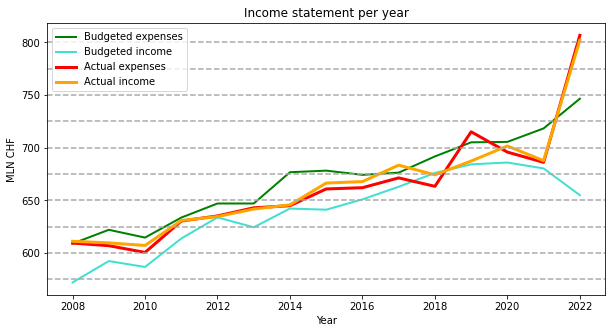

In [9]:
fig, ax = plt.subplots(figsize=(10,5))                        
ax.plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["B J"], color="green", linewidth=2, label="Budgeted expenses")
ax.plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["B J"], color="turquoise", linewidth=2, label="Budgeted income")
ax.plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["R J"], color="red", linewidth=3, label="Actual expenses")
ax.plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["R J"], color="orange", linewidth=3, label="Actual income")

[ax.axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(575, 825, 25)]

ax.set_title("Income statement per year")
ax.set_xlabel("Year")
ax.set_ylabel("MLN CHF")
ax.legend()
plt.show()

#### Discrepancies

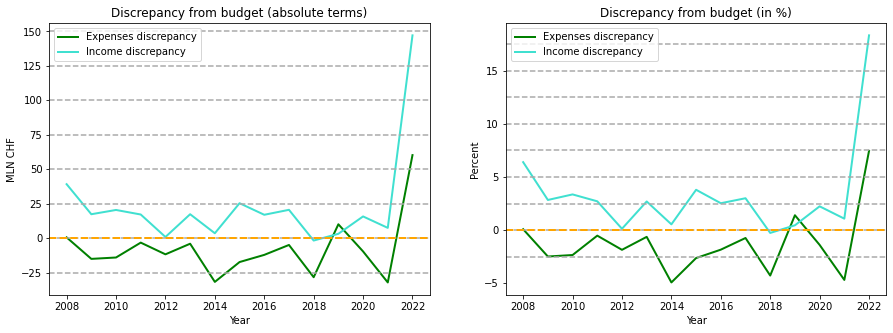

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))     

# left plot -> discrepancy in absolute terms
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["R J"] - df[df["Konto"] == "Aufwand"]["B J"], color="green", linewidth=2, label="Expenses discrepancy")
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Ertrag"]["R J"] - df[df["Konto"] == "Ertrag"]["B J"], color="turquoise", linewidth=2, label="Income discrepancy")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-25, 175, 25)]
ax[0].axhline(y = 0, color = 'orange', linestyle = '--', linewidth=2)

ax[0].set_title("Discrepancy from budget (absolute terms)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("MLN CHF")
ax[0].legend()

# right plot -> discrepancy in %
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Aufwand"]["R J"] - df[df["Konto"] == "Aufwand"]["B J"]) / df[df["Konto"] == "Aufwand"]["R J"] * 100, color="green", linewidth=2, label="Expenses discrepancy")
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Ertrag"]["R J"] - df[df["Konto"] == "Ertrag"]["B J"]) / df[df["Konto"] == "Ertrag"]["R J"] * 100, color="turquoise", linewidth=2, label="Income discrepancy")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-2.5, 18, 2.5)]
ax[1].axhline(y = 0, color = 'orange', linestyle = '--', linewidth=2)

ax[1].set_title("Discrepancy from budget (in %)")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Percent")
ax[1].legend()




plt.show()

#### Values and discrepancies in %

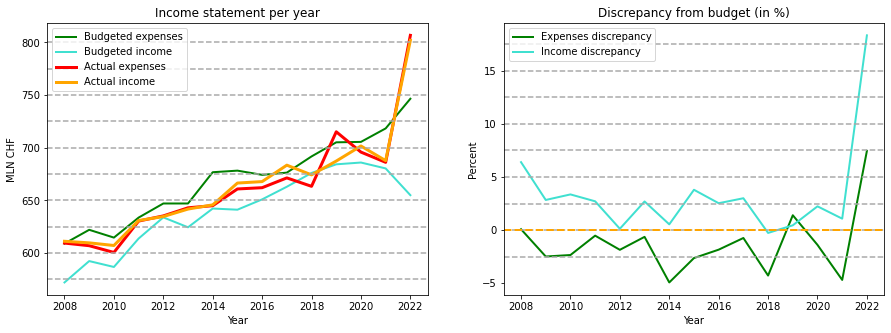

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))     

# left plot -> values
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["B J"], color="green", linewidth=2, label="Budgeted expenses")
ax[0].plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["B J"], color="turquoise", linewidth=2, label="Budgeted income")
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["R J"], color="red", linewidth=3, label="Actual expenses")
ax[0].plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["R J"], color="orange", linewidth=3, label="Actual income")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(575, 825, 25)]

ax[0].set_title("Income statement per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("MLN CHF")
ax[0].legend()

# right plot -> discrepancy in %
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Aufwand"]["R J"] - df[df["Konto"] == "Aufwand"]["B J"]) / df[df["Konto"] == "Aufwand"]["R J"] * 100, color="green", linewidth=2, label="Expenses discrepancy")
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Ertrag"]["R J"] - df[df["Konto"] == "Ertrag"]["B J"]) / df[df["Konto"] == "Ertrag"]["R J"] * 100, color="turquoise", linewidth=2, label="Income discrepancy")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-2.5, 18, 2.5)]
ax[1].axhline(y = 0, color = 'orange', linestyle = '--', linewidth=2)

ax[1].set_title("Discrepancy from budget (in %)")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Percent")
ax[1].legend()




plt.show()

## 4. Exporting the DF as XLSX. For later comparison between cities

In [12]:
df.to_excel("2. st_gallen.xlsx")